In [2]:
# class balance of Failure
raw_data['failure'].value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [3]:
# Number of observations per device id
obs_per_device=raw_data.groupby(['device'])['date'].nunique()
obs_per_device.head()

device
S1F01085     6
S1F013BB     6
S1F0166B     6
S1F01E6Y    48
S1F01JE0     6
Name: date, dtype: int64

In [4]:
# Do devices have observations of both failures and non-failures?
failures_per_device=raw_data.groupby(['device'])['failure'].max()
check=pd.merge(raw_data.loc[:,('device','failure')],failures_per_device, on='device', how='left')
print("# of devices that have both a recorded non-failure and failure: ",\
      len(check.loc[check.failure_x!=check.failure_y,'device'].drop_duplicates()))

# of devices that have both a recorded non-failure and failure:  106


Min Date:  2015-01-01 
Max Date:  2015-11-02


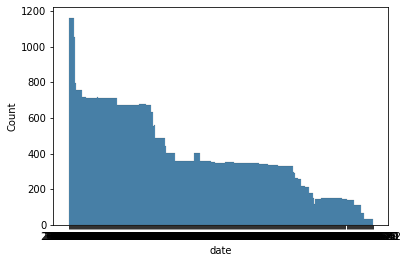

In [5]:
# Timeframe of data
import seaborn as sns
hist_date=sns.histplot(data=raw_data, x="date")
print("Min Date: ",min(raw_data.date),"\nMax Date: ",max(raw_data.date))

In [6]:
# split dataset 75/25
import numpy as num
from sklearn.model_selection import train_test_split

subjects = raw_data.groupby('device').last().reset_index() #most recent measurement for each device
pre_train, pre_test_set=train_test_split(subjects['device'], train_size=0.75, test_size=0.25, stratify=subjects['failure'])

# ensure no overlap
pd.merge(pre_train,pre_test_set, on='device', how='inner')

,device


In [7]:
train=raw_data[raw_data.device.isin(pre_train)]
test_set=raw_data[raw_data.device.isin(pre_test_set)]

In [8]:
print("Train set obs count ", train.shape[0],\
      "\nTest set obs count ", test_set.shape[0])

Train set obs count  94578 
Test set obs count  29916


In [9]:
# inspect 'failure' balance in train and test datasets
print("Train set failures are ", (train['failure'].value_counts()[1])/(len(train['failure']))*100,\
      "% of data.\nTest set failures are ", (test_set['failure'].value_counts()[1])/(len(test_set['failure']))*100,\
      "% of data.")

Train set failures are  0.08564359576222799 % of data.
Test set failures are  0.08356732183446985 % of data.


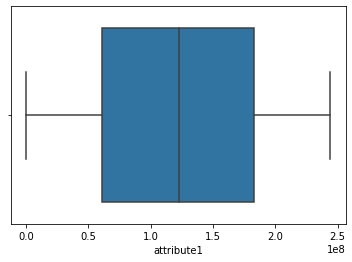

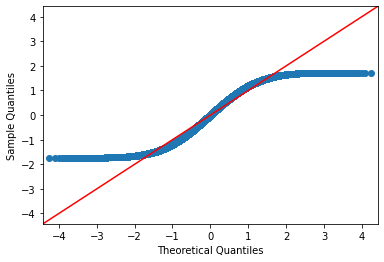

In [12]:
# Explore continuous variables via boxplots
import statsmodels.api as sm
box_v1 = sns.boxplot(x="attribute1", data=train)
qq_v1=sm.qqplot(train.attribute1,fit=True, line="45")

In [20]:
print("Pearson correlation between Attr7 and Attr8 is: ", stats.pearsonr(train.attribute7,train.attribute8)[0])

Pearson correlation between Attr7 and Attr8 is:  1.0


,median_att1,median_att2,median_att3,median_att4,median_att5,median_att6,median_att7,median_att9,max_att1,max_att2,max_att3,max_att4,max_att5,max_att6,max_att7,max_att9,days_since_start,failure
median_att1,1.000000,-0.093795,0.086561,-0.018875,-0.034672,0.014617,-0.080493,0.098803,0.288980,-0.071836,0.086934,-0.053335,-0.034657,0.011484,-0.044954,0.098881,-0.039860,-0.015747
median_att2,-0.093795,1.000000,0.000210,0.175982,-0.024385,-0.048257,0.150562,0.000340,-0.187057,0.707323,0.000192,0.245851,-0.026398,-0.058932,0.032962,0.000339,-0.080109,0.046528
median_att3,0.086561,0.000210,1.000000,0.402501,-0.025366,0.033574,-0.003355,0.473810,0.016969,-0.002818,0.999990,0.215848,-0.026074,0.026049,-0.004576,0.473814,-0.032790,-0.012815
median_att4,-0.018875,0.175982,0.402501,1.000000,-0.027615,0.009411,0.032916,0.183715,-0.155679,0.121202,0.402471,0.593524,-0.029523,-0.004144,0.002039,0.183707,-0.075176,0.026650
median_att5,-0.034672,-0.024385,-0.025366,-0.027615,1.000000,-0.023365,-0.035355,-0.024449,0.149348,-0.033605,-0.025406,-0.028249,0.998477,-0.022289,-0.009485,-0.024417,0.166700,0.031879
median_att6,0.014617,-0.048257,0.033574,0.009411,-0.023365,1.000000,0.012278,0.035637,-0.003322,-0.031300,0.033762,-0.017238,-0.023546,0.971897,-0.038891,0.035670,-0.002136,-0.009818
median_att7,-0.080493,0.150562,-0.003355,0.032916,-0.035355,0.012278,1.000000,-0.005134,-0.189680,0.101836,-0.003369,0.066413,-0.036923,0.002465,0.267646,-0.005141,-0.071944,0.061395
median_att9,0.098803,0.000340,0.473810,0.183715,-0.024449,0.035637,-0.005134,1.000000,0.007225,-0.004330,0.473787,0.095909,-0.025849,0.024488,0.022776,0.999999,-0.059546,-0.016594
max_att1,0.288980,-0.187057,0.016969,-0.155679,0.149348,-0.003322,-0.189680,0.007225,1.000000,-0.101418,0.017004,-0.125117,0.157712,0.063246,-0.020145,0.007262,0.485168,0.091467
max_att2,-0.071836,0.707323,-0.002818,0.121202,-0.033605,-0.031300,0.101836,-0.004330,-0.101418,1.000000,-0.002840,0.257798,-0.033310,-0.034724,0.049599,-0.004335,-0.015269,0.143352


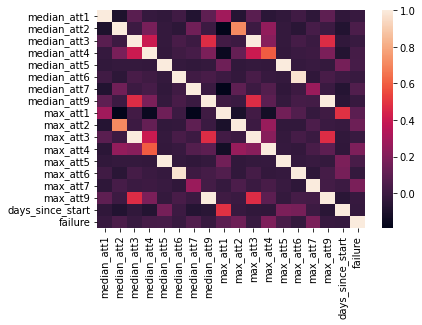

In [34]:
# Feature correlations
var_corr=final_train_transformed.corr()
# plot the heatmap
sns.heatmap(var_corr, 
        xticklabels=var_corr.columns,
        yticklabels=var_corr.columns)
var_corr